<a href="https://colab.research.google.com/github/vaguinho707/pucriosprint4-backend/blob/main/Modelo_MVP_Qualidade_de_Software%2C_Seguran%C3%A7a_e_Sistemas_Inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP
# Vagner Morais
## Disciplina: Sprint: Qualidade de Software, Segurança e Sistemas Inteligentes

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier


# Useful Tools

In [2]:
def cleanData(dataframe):
    dataframe['annual_salary'] = pd.to_numeric(dataframe['annual_salary'], errors='coerce')
    dataframe.dropna(inplace=True)
    print(dataframe[dataframe['credit_score'] == 'Excelent'].shape[0])
    print(dataframe[dataframe['credit_score'] == 'Fair'].shape[0])
    print(dataframe[dataframe['credit_score'] == 'Poor'].shape[0])
    return dataframe

## Carga do Dataset

In [3]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/vaguinho707/pucriosprint4/refs/heads/main/customer_data.csv"
cols = [
    'age',
    'annual_salary',
    'num_accounts',
    'loan_interest',
    'num_loans',
    'days_overdue',
    'num_late_payments',
    'total_debt',
    'credit_score'
]

# Lê o arquivo
dataset = pd.read_csv(url, usecols=cols, delimiter=',')
dataset = cleanData(dataset)
# Mostra as primeiras linhas do dataset
dataset.head()

15664
46620
25508


,age,annual_salary,num_accounts,loan_interest,num_loans,days_overdue,num_late_payments,total_debt,credit_score
1,27.0,121688.04,7.0,12.0,4.0,18.0,13.0,54.68,Fair
2,27.0,121688.04,7.0,12.0,4.0,20.0,13.0,54.68,Fair
3,27.0,121688.04,7.0,12.0,4.0,20.0,15.0,54.68,Fair
4,27.0,121688.04,7.0,12.0,4.0,20.0,15.0,54.68,Fair
5,27.0,121688.04,7.0,12.0,4.0,20.0,15.0,54.68,Fair


## Separação em conjunto de treino e conjunto de teste com holdout

In [4]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:8]
y = array[:,8]
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.713164 (0.008441)
RF: 0.798606 (0.006007)
NB: 0.641742 (0.008023)
SVM: 0.544516 (0.005669)


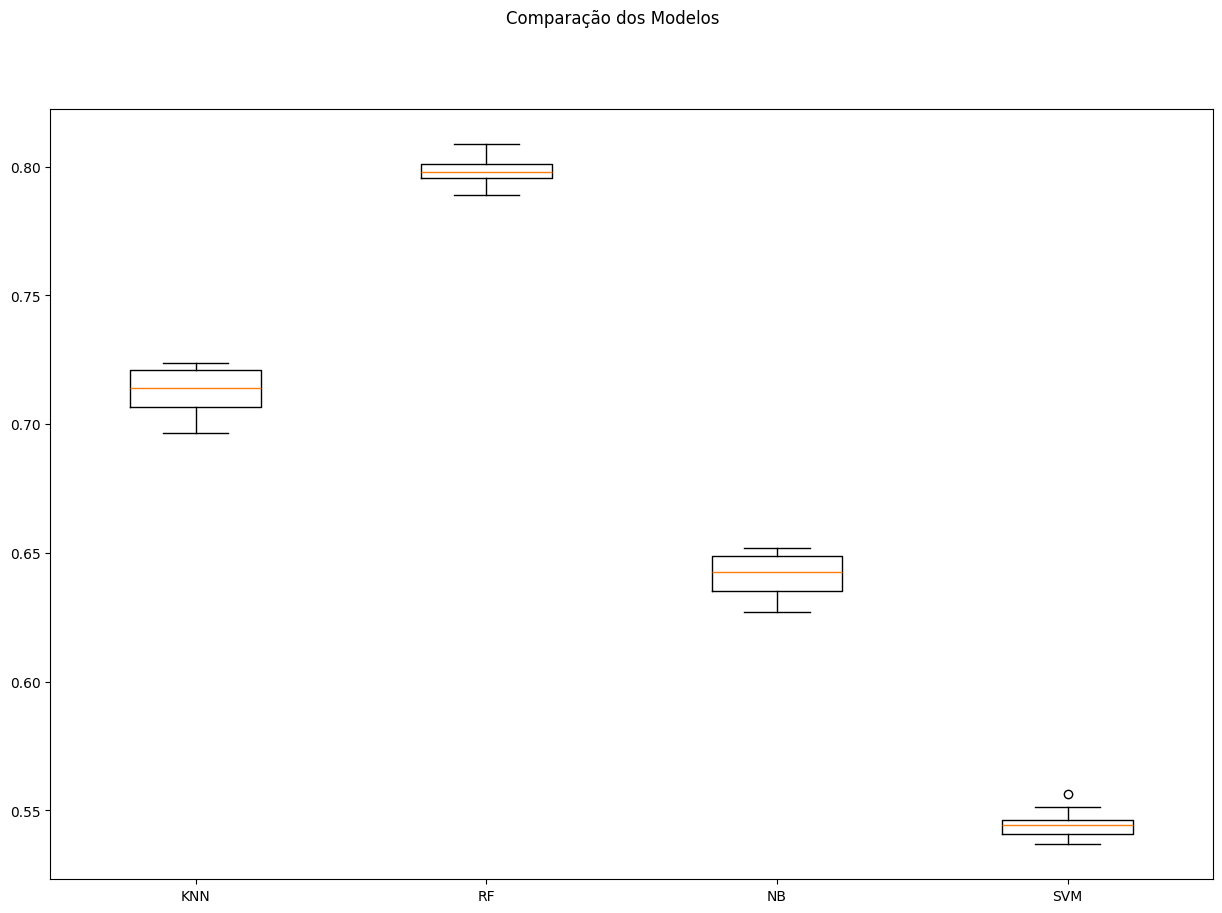

In [5]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.713 (0.008)
RF-orig: 0.799 (0.006)
NB-orig: 0.642 (0.008)
SVM-orig: 0.545 (0.006)
KNN-padr: 0.749 (0.009)
RF-padr: 0.799 (0.006)
NB-padr: 0.645 (0.008)
SVM-padr: 0.685 (0.007)
KNN-norm: 0.748 (0.009)
RF-norm: 0.799 (0.005)
NB-norm: 0.645 (0.008)
SVM-norm: 0.684 (0.008)


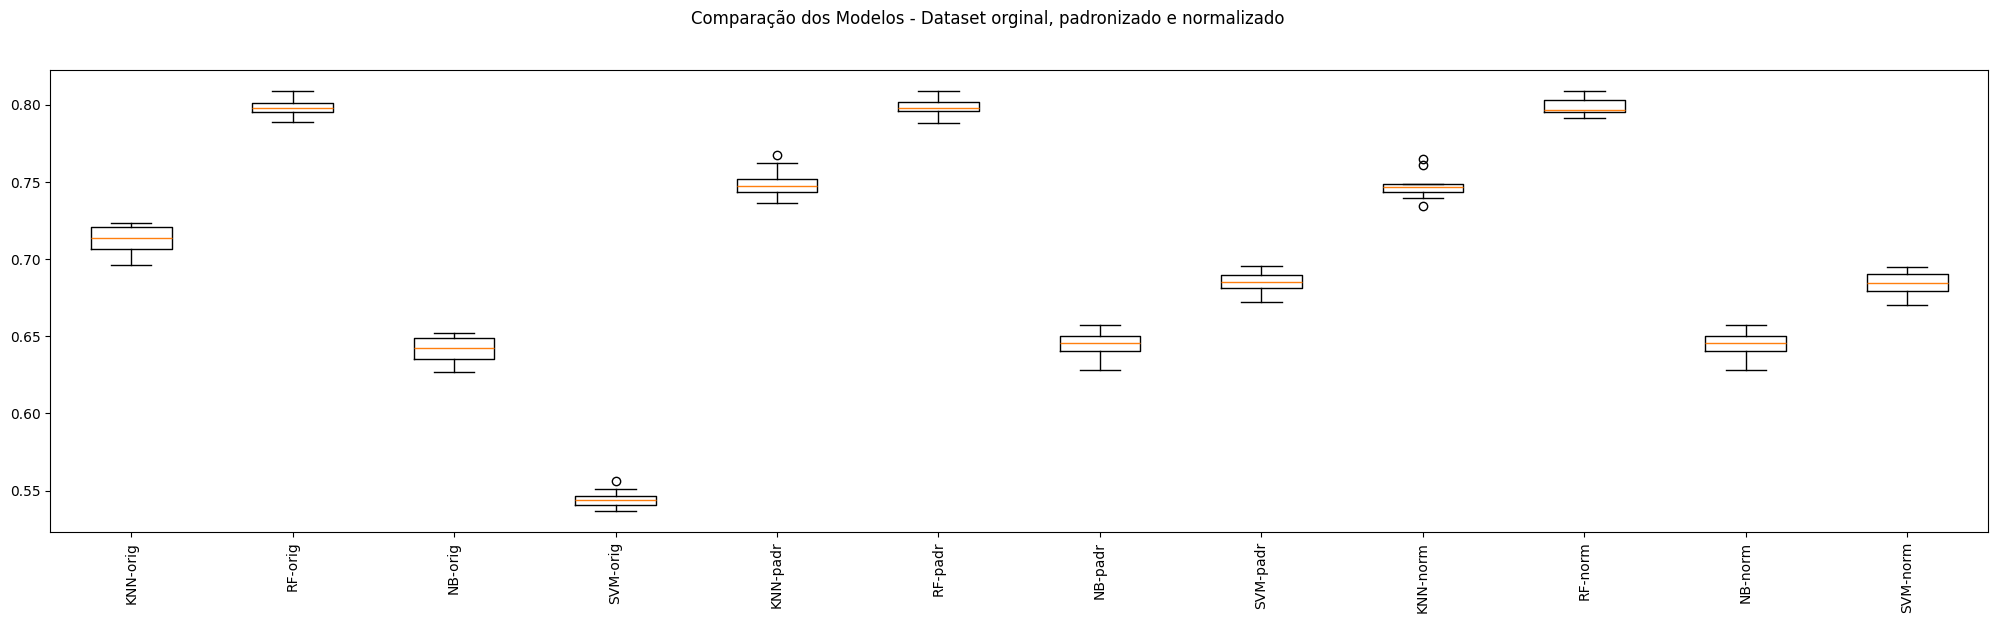

In [7]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
rf = ('RF', RandomForestClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('RF-orig', Pipeline([rf])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, rf])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, rf])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [11]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
rf = ('RF', RandomForestClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('RF-orig', Pipeline(steps=[rf])))
pipelines.append(('RF-padr', Pipeline(steps=[standard_scaler, rf])))
pipelines.append(('RF-norm', Pipeline(steps=[min_max_scaler, rf])))

param_grid = {
    'RF__n_estimators': [140, 210, 300],
    'RF__max_depth': [None, 2, 4],
    'RF__min_samples_split': [3, 5, 7]
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: RF-orig - Melhor: 0.804299 usando {'RF__max_depth': None, 'RF__min_samples_split': 3, 'RF__n_estimators': 300}
Sem tratamento de missings: RF-padr - Melhor: 0.803900 usando {'RF__max_depth': None, 'RF__min_samples_split': 3, 'RF__n_estimators': 210}
Sem tratamento de missings: RF-norm - Melhor: 0.803235 usando {'RF__max_depth': None, 'RF__min_samples_split': 3, 'RF__n_estimators': 300}


## Finalização do Modelo

In [12]:
# Avaliação do modelo com o conjunto de testes
model = RandomForestClassifier(n_estimators=300, min_samples_split=3, max_depth=None,  random_state=42)

# Preparação do modelo
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8045536759229706


In [13]:
# Preparação do modelo com TODO o dataset
model.fit(X, y)

RandomForestClassifier(min_samples_split=3, n_estimators=300, random_state=42)

## Simulando a aplicação do modelo em dados não vistos

In [14]:
# Novos dados - não sabemos a classe!

data = {
        'age': [25, 34, 46],
        'annual_salary': [19000.33, 34148.50, 30144.22],
        'num_accounts': [1, 3, 2],
        'loan_interest': [29.55, 15.33, 6.38],
        'num_loans': [15, 9, 3],
        'days_overdue': [60, 20, 4],
        'num_late_payments': [30, 9, 1],
        'total_debt': [20345.33, 1000.55, 835.00],
}

atributos = [
    'age',
    'annual_salary',
    'num_accounts',
    'loan_interest',
    'num_loans',
    'days_overdue',
    'num_late_payments',
    'total_debt',
    ]
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)


In [15]:
# Predição de classes dos dados de entrada
saidas = model.predict(X)
print(saidas)

['Fair' 'Excelent' 'Excelent' ... 'Poor' 'Poor' 'Poor']


In [16]:
pickle_out = open('customer_classifier.pkl', 'wb')
pickle.dump(model, pickle_out)
pickle_out.close()